# BIOS Final Project

In this project, I am working on the automobile dataset from Kaggle to perform basic analysis and create visualizations to interprete the results. 

Starting off with loading the required libraries and reading the data 

In [1]:
library("tidyverse")
library("readxl")

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The data has 9 columns and I will be working on mainly the following five:
1. mpg
1. horsepower
1. acceleration
1. model_year
1. origin

In [4]:
cars = read_csv("Automobile.csv")
cars %>% head()

Rows: 398 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, origin
dbl (7): mpg, cylinders, displacement, horsepower, weight, acceleration, mod...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chevrolet chevelle malibu,18,8,307,130,3504,12.0,70,usa
buick skylark 320,15,8,350,165,3693,11.5,70,usa
plymouth satellite,18,8,318,150,3436,11.0,70,usa
amc rebel sst,16,8,304,150,3433,12.0,70,usa
ford torino,17,8,302,140,3449,10.5,70,usa
ford galaxie 500,15,8,429,198,4341,10.0,70,usa


The first plot just depicts the average horsepower of the vehicles in each country and according to the analysis vehicles in the US seem to have the most average horse power compared to the other two countries. 

To get this chart, I have created a bar graph with "origin" on the x-axis and caculated average horsepower using stats in the geom_bar function for the y_axis, filling the bars by origin to make it colorful.

Warning message:
“Removed 6 rows containing non-finite values (`stat_summary()`).”


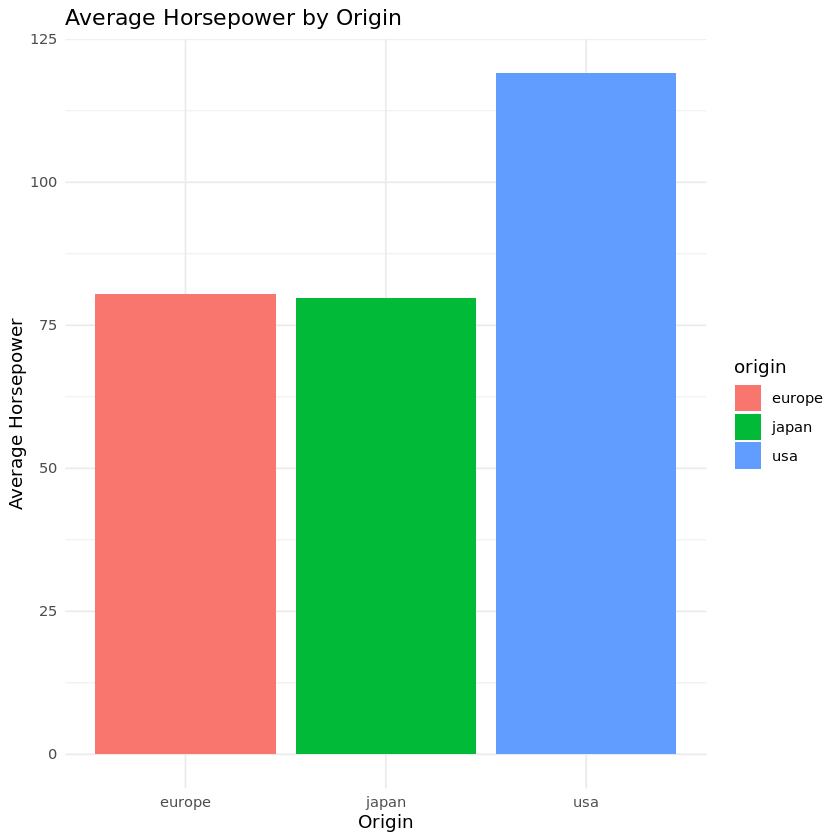

In [11]:
plot1 = ggplot(cars, aes(x = origin, y = horsepower, fill = origin)) +
          geom_bar(stat = "summary", fun = "mean") +
          labs(title = "Average Horsepower by Origin", x = "Origin", y = "Average Horsepower") +
          theme_minimal()
plot1

In the second chart a scatter plot depicts the comparision between acceleration and miles per gallon. According to the analysis, they are both directly propotional to each other.

Creating this graph was fairly simple with scatter plot having acceleration on x-axis and mpg on y-axis and colored using the origin to understand the distribution in each country.

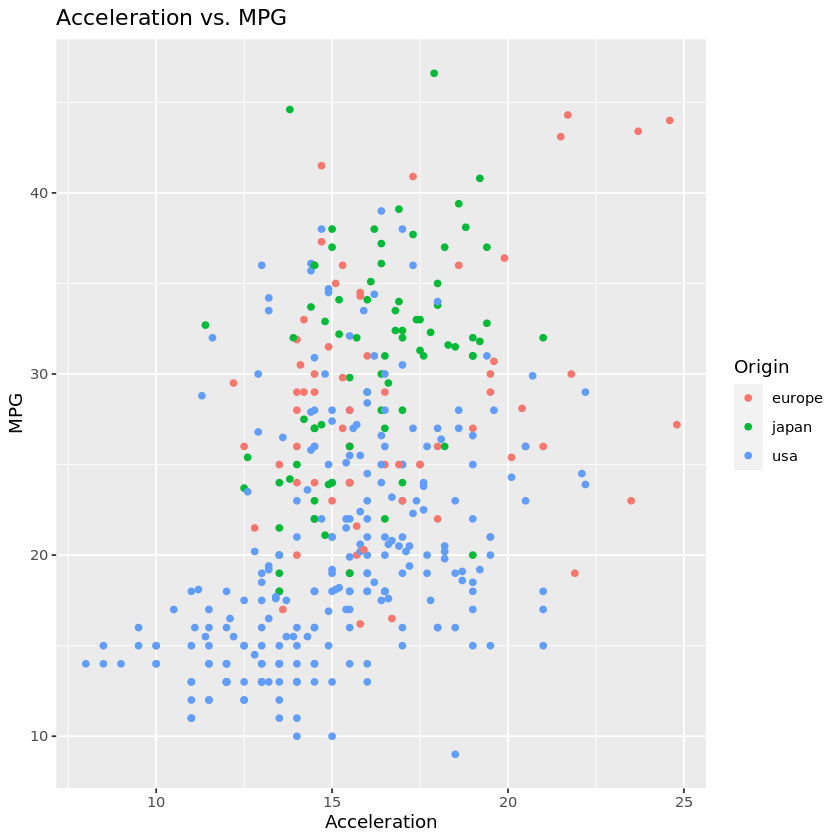

In [39]:
plot2 = ggplot(cars, aes(x = acceleration, y = mpg, color = origin)) +
        geom_point() +
        labs(title = "Acceleration vs. MPG", x = "Acceleration", y = "MPG") +
        scale_color_discrete(name = "Origin")

plot2

In the final chart, the analysis is about the trend of mpg over the years in each country of origin, where we can see the mpg of the vehicles mostly has an increasing trend over the years. With USA having a straight up after 75

For this chart, I created a new dataframe based on the cars dataframe, grouping by the data with model_year and origin and calculating the mean of mpg for each record. Later created a line graph on the new dataframe to showcase the results.

`summarise()` has grouped output by 'model_year'. You can override using the
`.groups` argument.


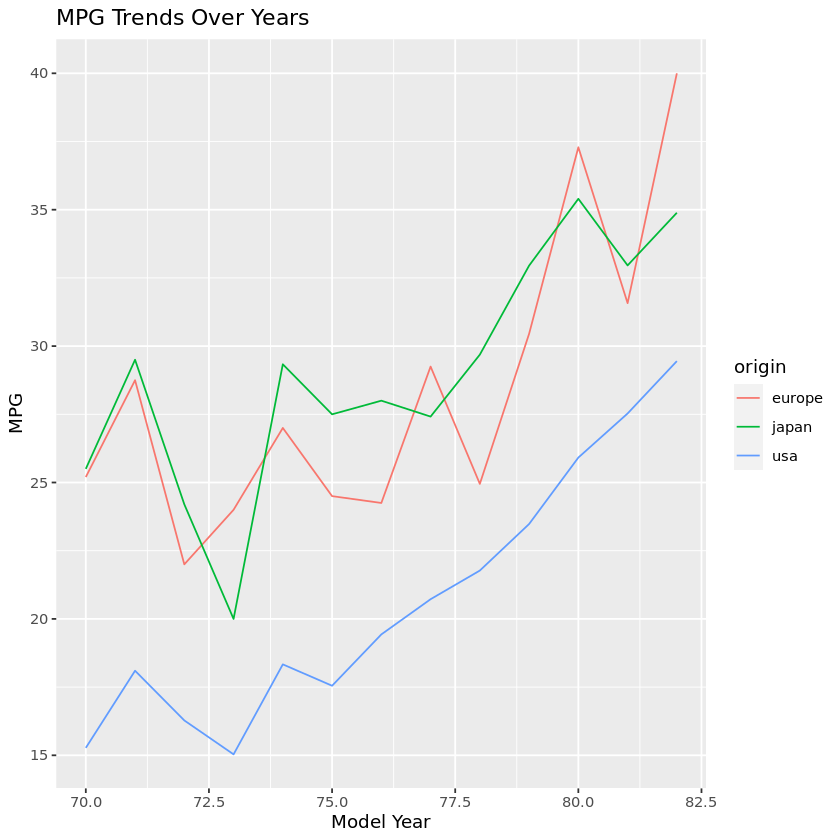

In [38]:
car_trends = cars %>%
             group_by(model_year, origin) %>%
             summarize(avg_acc = mean(mpg))

plot3 = ggplot(car_trends, aes(x = model_year, y = avg_acc, color = origin)) +
        geom_line() +
        labs(title = "MPG Trends Over Years", x = "Model Year", y = "MPG")

plot3